In [29]:
import numpy as np
import pandas as pd

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
train_data = pd.read_csv(r"C:\Users\PURVA\Downloads\archive (11)\Genre Classification Dataset\train_data.txt",sep=":::",names=['movie','genre','description'],engine='python')

In [32]:
train_data.shape

(54214, 3)

In [33]:
train_data.head()

,movie,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [34]:
test_data =pd.read_csv(r"C:\Users\PURVA\Downloads\archive (11)\Genre Classification Dataset\test_data_solution.txt",sep=":::",names=['movie','genre','description'],engine='python')

In [35]:
test_data.shape

(54200, 3)

In [36]:
test_data.head()

,movie,genre,description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [38]:
train_data.isnull().sum()

movie          0
genre          0
description    0
dtype: int64

In [39]:
test_data.isnull().sum()

movie          0
genre          0
description    0
dtype: int64

In [40]:
train_data.loc[:,'description'] = train_data['description'].astype(str).str.lower()

In [41]:
test_data.loc[:,'description'] = test_data['description'].astype(str).str.lower()

In [42]:
train_data.drop(columns=['movie'],inplace=True)
test_data.drop(columns=['movie'],inplace=True)

In [43]:
train_data.duplicated().sum()

110

In [44]:
test_data.duplicated().sum()

114

In [45]:
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()


In [46]:
test_data.duplicated().sum()

0

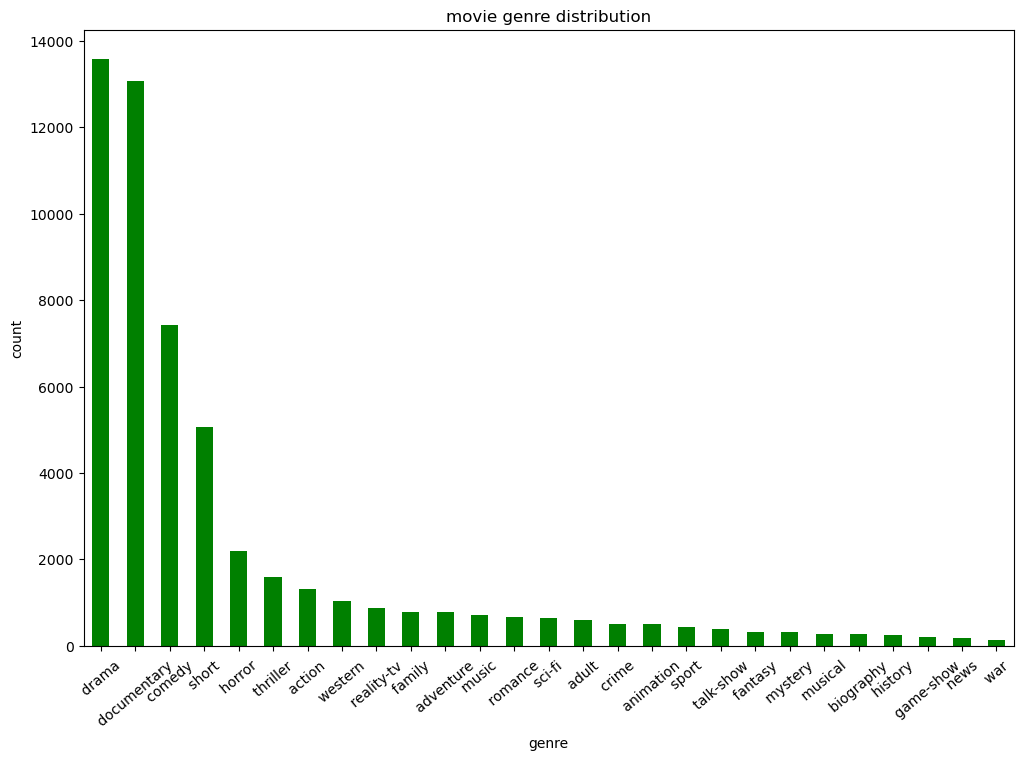

In [50]:
genre_value_count = train_data['genre'].value_counts()
plt.figure(figsize=(12,8))
genre_value_count.plot(kind='bar',color='green')
plt.title("movie genre distribution")
plt.xlabel("genre")
plt.ylabel("count")
plt.xticks(rotation=40)
plt.show()

In [51]:
X = train_data['description']
y = train_data['genre']

x_test = test_data['description']
y_test = test_data['genre']


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
xtrain,xval,ytrain,yval = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [60]:
tfidf = TfidfVectorizer(stop_words = 'english',max_features=5000)
xtrain_vec = tfidf.fit_transform(xtrain)
xval_vec = tfidf.transform(xval)
xtest_vec = tfidf.transform(xtest)

In [61]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(xtrain_vec,ytrain)

MultinomialNB()

In [62]:
ypred_val = nb.predict(xval_vec)

In [77]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_val = accuracy_score(yval,ypred_val)
print("validation accuracy:",accuracy_val)
print("validation classification report:\n",classification_report(yval,ypred_val,zero_division=0))

validation accuracy: 0.5261990573884114
validation classification report:
                precision    recall  f1-score   support

      action        0.52      0.06      0.11       271
       adult        0.50      0.03      0.06       118
   adventure        0.64      0.06      0.12       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.51      0.44      0.47      1445
       crime        0.00      0.00      0.00        88
 documentary        0.59      0.89      0.71      2685
       drama        0.46      0.83      0.59      2720
      family        0.00      0.00      0.00       145
     fantasy        0.00      0.00      0.00        57
   game-show        1.00      0.20      0.33        40
     history        0.00      0.00      0.00        52
      horror        0.71      0.34      0.46       429
       music        0.93      0.09      0.17       148
     musical        0.00      0.00      0.00

In [76]:
ypred_test = nb.predict(xtest_vec)
accuracy_test = accuracy_score(ytest,ypred_test)
print("validation accuracy:",accuracy_test)
print("validation classification report:\n",classification_report(ytest,ypred_test,zero_division=0))

validation accuracy: 0.5188773434899974
validation classification report:
                precision    recall  f1-score   support

      action        0.59      0.09      0.15      1314
       adult        0.54      0.06      0.10       590
   adventure        0.81      0.05      0.10       773
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.42      0.46      7437
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.87      0.69     13085
       drama        0.45      0.83      0.59     13565
      family        0.00      0.00      0.00       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.27      0.43       193
     history        0.00      0.00      0.00       243
      horror        0.70      0.33      0.45      2204
       music        0.79      0.09      0.16       720
     musical        0.00      0.00      0.00

In [65]:
from sklearn.linear_model import LogisticRegression


In [67]:
model = LogisticRegression()
model.fit(xtrain_vec,ytrain)

C:\Users\PURVA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
ypred_val_logi = model.predict(xval_vec)

In [70]:
accuracy_val1 = accuracy_score(yval,ypred_val_logi)
print("Validation Accuracy:", accuracy_val1)
print("Validation Classification Report:")
print(classification_report(yval, ypred_val, zero_division=0))

Validation Accuracy: 0.5853433139266242
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.52      0.06      0.11       271
       adult        0.50      0.03      0.06       118
   adventure        0.64      0.06      0.12       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.51      0.44      0.47      1445
       crime        0.00      0.00      0.00        88
 documentary        0.59      0.89      0.71      2685
       drama        0.46      0.83      0.59      2720
      family        0.00      0.00      0.00       145
     fantasy        0.00      0.00      0.00        57
   game-show        1.00      0.20      0.33        40
     history        0.00      0.00      0.00        52
      horror        0.71      0.34      0.46       429
       music        0.93      0.09      0.17       148
     musical        0.00      0.00      0.00 

In [71]:
ypred_test_logi = model.predict(xtest_vec)
accuracy_test1 = accuracy_score(ytest, ypred_test_logi)
print("\nTest Accuracy:", accuracy_test1)
print("Test Classification Report:")
print(classification_report(ytest, ypred_test, zero_division=0))


Test Accuracy: 0.5771918795991569
Test Classification Report:
               precision    recall  f1-score   support

      action        0.59      0.09      0.15      1314
       adult        0.54      0.06      0.10       590
   adventure        0.81      0.05      0.10       773
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.42      0.46      7437
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.87      0.69     13085
       drama        0.45      0.83      0.59     13565
      family        0.00      0.00      0.00       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.27      0.43       193
     history        0.00      0.00      0.00       243
      horror        0.70      0.33      0.45      2204
       music        0.79      0.09      0.16       720
     musical        0.00      0.00      0.00       273
 